# Using Gensim Word2Vec model

In [70]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.charts import Scatter, show, output_file
from bokeh.models import LabelSet, ColumnDataSource
from bokeh.io import output_notebook,vplot
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from sklearn import cluster
import pylab as pl
output_notebook()

Loading BokehJS ...

In [71]:
model = Word2Vec.load("./data/300features_40minwords_10context_AnnouncementTitle")

### We are using the gensim word2vec model in this step. The model contains 602 unique words. We then use t-Distributed Stochastic Neighbor Embedding to reduce the hundred dimension data to visualize the related words

In [72]:
#lower the dimention of each word vector
tsne=TSNE(random_state=0)
np.set_printoptions(suppress=True)
vec = np.empty((0,100), float)
dic= list(model.vocab.keys())
for i in dic:
    vec = np.vstack((vec, model[i]))
low_dim = tsne.fit_transform(vec)

In [73]:
## create word graph
df = pd.DataFrame(low_dim, columns=['x','y'])
df['vocab'] = dic
source = ColumnDataSource(data=dict(x=df['x'],
                                    y=df['y'],
                                    vocab=dic))
p = Scatter(df, x='x', y='y', title = "vocab in hypterdimention")
labels = LabelSet(x='x', y='y', text='vocab', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas')
p.add_layout(labels)
# output_file("word2vec.html", title="word2vec")
show(p)

## In this step, we tokenize each email body and it's title to an array

In [75]:
def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [ ]:
data = pd.read_csv('data/announcements.csv')
features = 100
emails = [None] * data["Body"].shape[0]  # Initialize an empty list of sentences
i = 0
for review in data["Body"]:
    emails[i] = review_to_wordlist(str(review))
    i = i+1

size = len(emails)
print(size)

## We apply cbow in this step. We sum vector value for each word in the email and then average them out to get the vector result of the entire email

In [77]:
cbow = [None] * data["Body"].shape[0]
i = 0
for email in emails:
    base = [0] * features
    wordSkipped = 0
    for word in email:
        if model.vocab.get(word) is None :
            wordSkipped = wordSkipped+1
            continue
        base = base + model[word]
    cbow[i] = np.array(base) / (len(email) - wordSkipped)
    i = i + 1   

## This creates a dataframe of 4167 by 100

In [78]:
cbow = pd.DataFrame(cbow)
cbow.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.081044,0.120048,-0.214332,0.023244,-0.194121,-0.135236,-0.124679,-0.006984,0.012508,-0.018914,...,0.332130,-0.162919,-0.016504,0.002306,-0.112821,-0.087409,0.130997,0.107545,0.131004,0.018700
1,0.083001,0.120911,-0.213671,0.022072,-0.193722,-0.133595,-0.124528,-0.005989,0.012645,-0.019098,...,0.334038,-0.161045,-0.016837,0.002007,-0.113065,-0.085503,0.132001,0.108012,0.132286,0.017100
2,0.082162,0.119396,-0.213789,0.022896,-0.195183,-0.135445,-0.124993,-0.007851,0.013056,-0.019867,...,0.331791,-0.162601,-0.018264,0.003346,-0.112653,-0.088346,0.130855,0.106940,0.130483,0.018068
3,0.081430,0.120568,-0.214062,0.022564,-0.194516,-0.135638,-0.123869,-0.008036,0.014589,-0.020150,...,0.331023,-0.162270,-0.017686,0.002095,-0.111514,-0.087506,0.130697,0.107773,0.131458,0.019663
4,0.082906,0.120533,-0.214117,0.022283,-0.194769,-0.134524,-0.124535,-0.005876,0.012120,-0.019322,...,0.331315,-0.162607,-0.016168,0.002496,-0.112543,-0.085386,0.130893,0.107889,0.132552,0.019264
5,0.083573,0.119584,-0.212844,0.026070,-0.194044,-0.132119,-0.124431,-0.004414,0.017154,-0.021155,...,0.332160,-0.161039,-0.016460,0.006356,-0.112892,-0.087620,0.130797,0.103076,0.128253,0.019943
6,0.082129,0.119903,-0.213281,0.021966,-0.195038,-0.135154,-0.124504,-0.007671,0.013432,-0.019695,...,0.332401,-0.161836,-0.017391,0.002472,-0.112246,-0.088251,0.130837,0.107872,0.131257,0.017485
7,0.081716,0.119168,-0.213707,0.022508,-0.194497,-0.134330,-0.124553,-0.006115,0.011749,-0.019941,...,0.331571,-0.162470,-0.017895,0.004719,-0.112899,-0.088964,0.130565,0.107675,0.130592,0.017850
8,0.082718,0.119846,-0.214099,0.023783,-0.194817,-0.133712,-0.124341,-0.006165,0.013876,-0.019850,...,0.331815,-0.161549,-0.016832,0.003321,-0.112193,-0.085672,0.131798,0.106688,0.130736,0.018730
9,0.081896,0.119258,-0.213478,0.021860,-0.195447,-0.135373,-0.125287,-0.006664,0.012092,-0.020762,...,0.333341,-0.160956,-0.017153,0.002836,-0.112881,-0.086199,0.131100,0.108746,0.133538,0.019706


In [79]:
cbow.to_csv("./data/100_features.csv",index = False)

# K-Mean Clustering

In [61]:
df = pd.read_csv('./data/100_features.csv')
df = df.dropna()
df = df.reset_index(drop=True)

## Below shows the dimention reduced graph of the 4070 after remove the empty emails. 

In [27]:
k_means = cluster.KMeans(n_clusters=9, random_state=0)
k_means.fit(df) 

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=9, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)

In [68]:
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
x = model.fit_transform(df) 

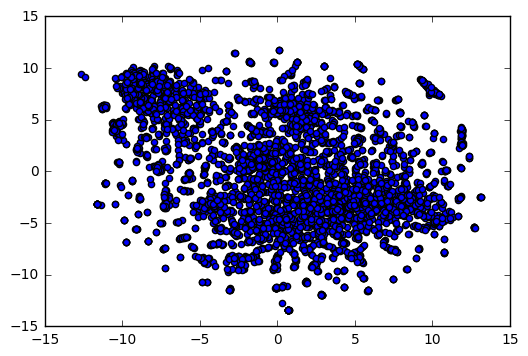

In [69]:
pl.scatter(x[:, 0], x[:, 1]) 
pl.show()

## We decide to label the emails into 9 clusters

In [54]:
cluster = np.zeros([df.shape[0],1])
for i in range(df.shape[0]) :
    row = np.reshape(df.ix[i][0:df.ix[0].shape[0]], [1,-1])
    cluster[i] = k_means.predict(row)
df['cluster'] = cluster
df2 = pd.DataFrame(x)
df2['cluster'] = cluster
df2.columns = ['X', 'Y', 'cluster']

In [55]:
df2.to_csv('./data/100_clustered_emails.csv')

In [56]:
fig = Scatter(df2,x='X',y='Y',
              color='cluster',
              legend='top_left',
              title='KNN Classifier')
show(fig)